In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv("sample_sentiment_dataset.csv")
print(df.head())


                                  review  sentiment
0   I love this product, it works great!          1
1  Terrible service, will not recommend.          0
2       Very satisfied with my purchase.          1
3                 Worst experience ever.          0
4     Amazing quality and fast delivery!          1


In [4]:
import re

def clean_text(text):
    text = text.lower()                            # lowercase
    text = re.sub(r'[^\w\s]', '', text)            # remove punctuation
    text = re.sub(r'\d+', '', text)                # remove digits
    return text

df['clean_review'] = df['review'].apply(clean_text)

In [5]:
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test_tfidf)

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


Confusion Matrix:
 [[0 1]
 [1 0]]


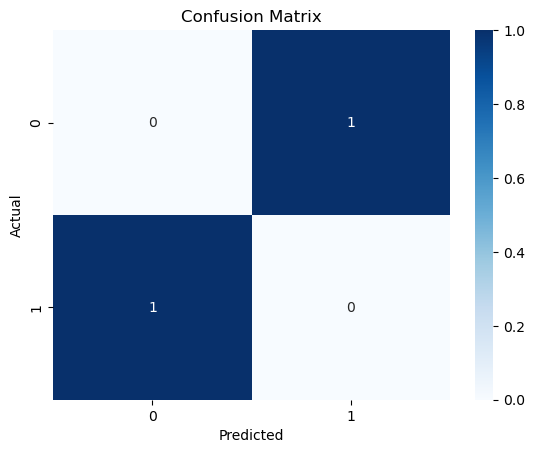

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()